In [505]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.mlab as mlab
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [506]:
data = pd.read_csv("./input/train.csv")

In [507]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [508]:
data.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [509]:
data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [510]:
for col in data.select_dtypes('object').columns:
    print(f'Column name: {col}')
    print(f'Unique values:\n{data[col].unique()}\n')

Column name: gender
Unique values:
['f' 'm']

Column name: ethnicity
Unique values:
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']

Column name: jaundice
Unique values:
['no' 'yes']

Column name: austim
Unique values:
['no' 'yes']

Column name: contry_of_res
Unique values:
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']

Column name: used_

In [511]:
class DataPreprocessor:
    def __init__(self, dataset, train_dataset = data):
        self.dataset = dataset
        self.train_dataset = train_dataset
        
    def cleaning(self):
        self.dataset.drop(['ID', 'age_desc'], axis=1, inplace=True)
        
        self.dataset['ethnicity'] = self.dataset['ethnicity'].str.replace('others', 'Others', regex=True).str.replace(r'?', 'Others', regex=True)
        self.dataset['relation'] = self.dataset['relation'].replace('?', 'Others') 
        
        self.dataset['gender'] = self.dataset['gender'].map({'m':1,'f':0})
        self.dataset['jaundice'] = self.dataset['jaundice'].map({'yes':1,'no':0})
        self.dataset['used_app_before'] = self.dataset['used_app_before'].map({'yes':1,'no':0})
        self.dataset['austim'] = self.dataset['austim'].map({'yes':1,'no':0})
        
        data_contry_of_res = pd.DataFrame(self.train_dataset['contry_of_res'].value_counts())
        lis = list(data_contry_of_res[data_contry_of_res.contry_of_res > 10].index)
        self.dataset['contry_of_res'] = self.dataset['contry_of_res'].apply(lambda x: x if x in lis else 'Others')
        return self.dataset
    
    
    def encode_categorical(self):
        recode_col = ['ethnicity', 'contry_of_res', 'relation']
        ord_enc = ce.OrdinalEncoder(cols=recode_col).fit(self.train_dataset)
        self.dataset = ord_enc.transform(self.dataset)
        return self.dataset
        
    def preprocess_data(self):
        self.cleaning()
        self.encode_categorical()
        return self.dataset

In [512]:
train_test_val = DataPreprocessor(data).cleaning()

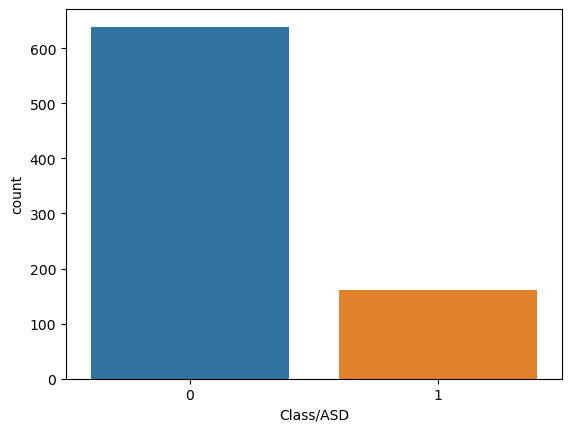

In [513]:
sns.countplot(x='Class/ASD',data=data);

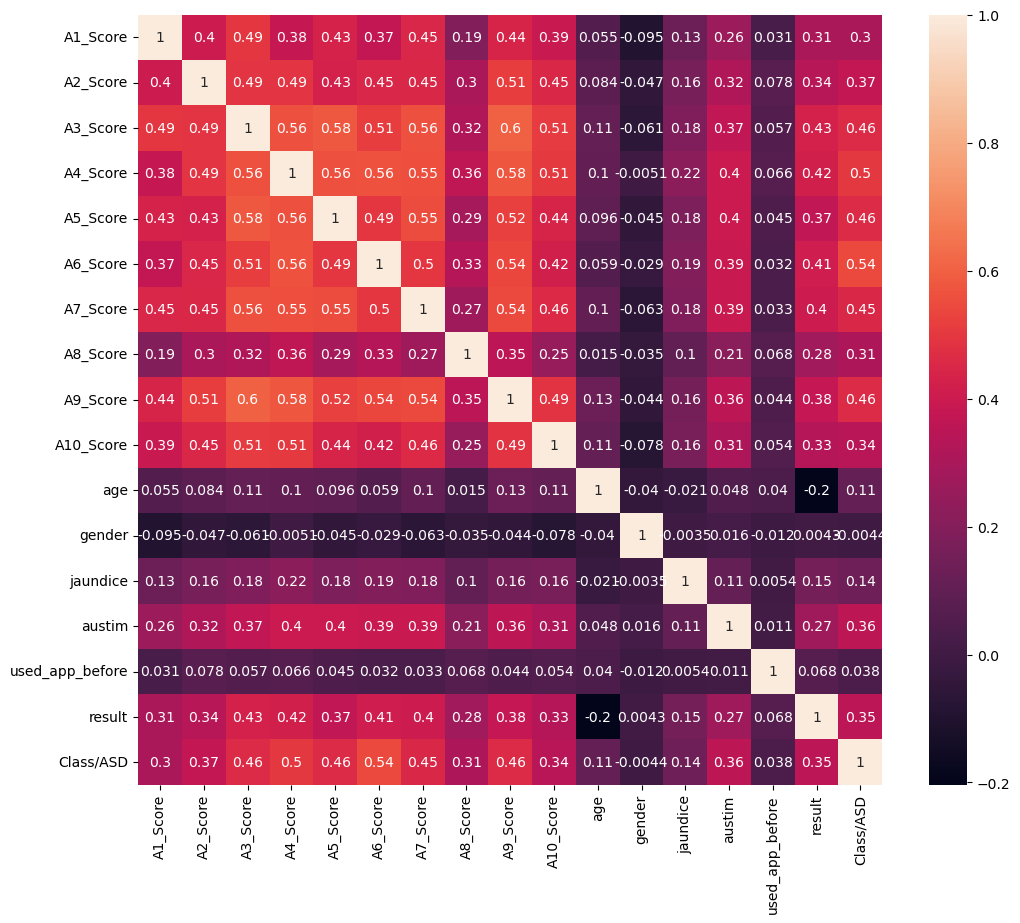

In [514]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_test_val.corr(), annot=True);

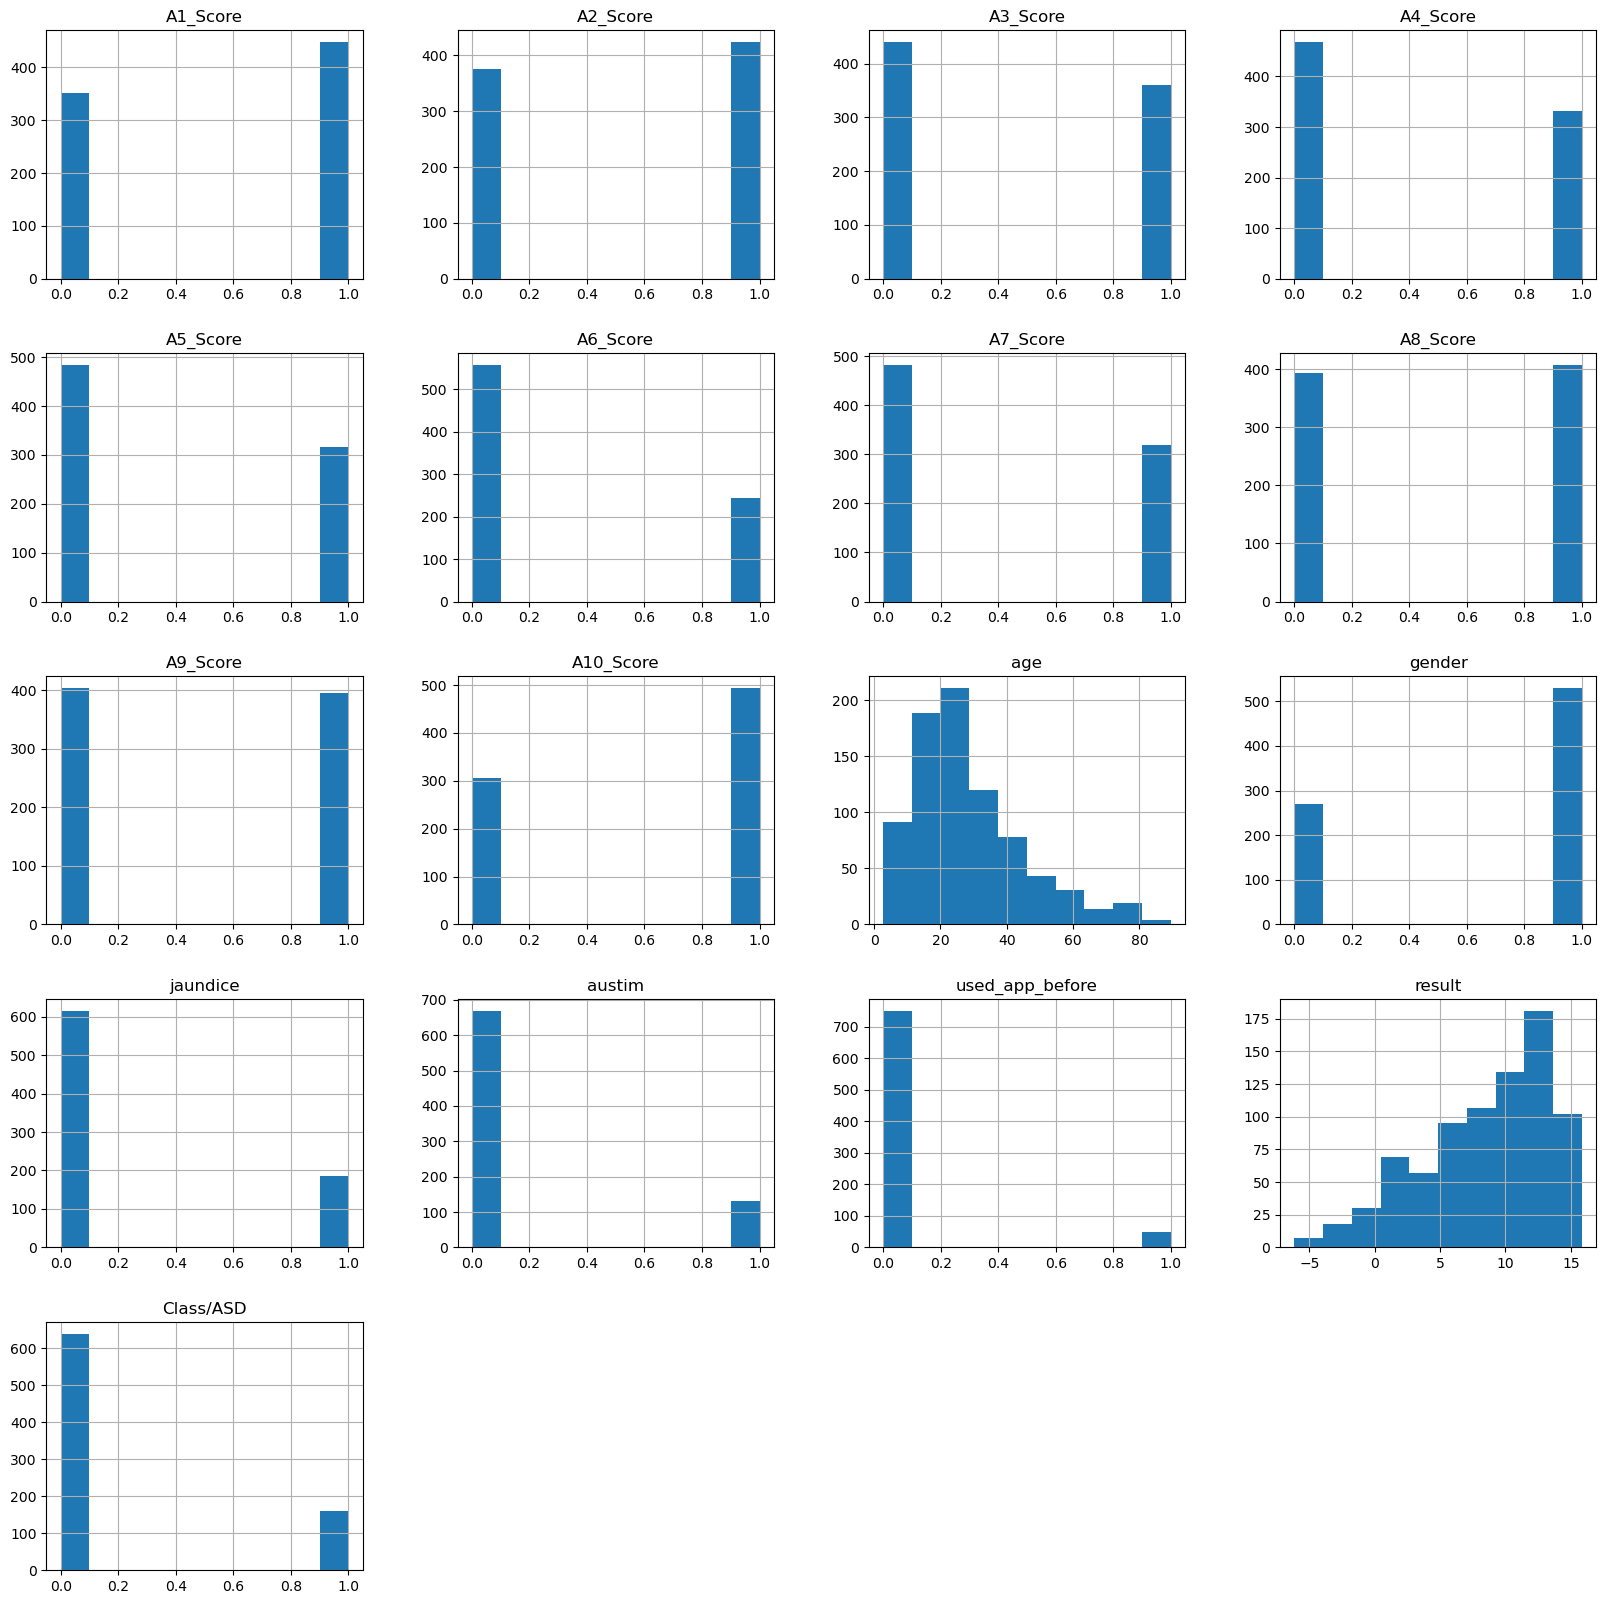

In [515]:
train_test_val.hist(figsize=(20, 20));

In [516]:
def barplot_plot(x, y='Class/ASD', data=train_test_val):
    plt.figure(figsize=(15,5))
    sns.barplot(x=x, y=y, data=data)
    plt.title(y+' depending on '+ x)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

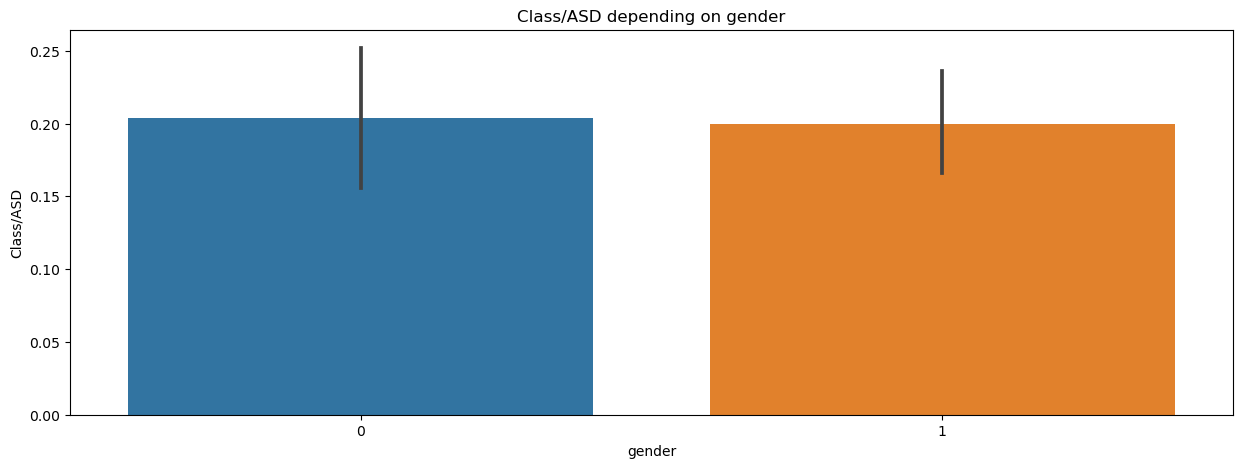

In [517]:
barplot_plot(x='gender')

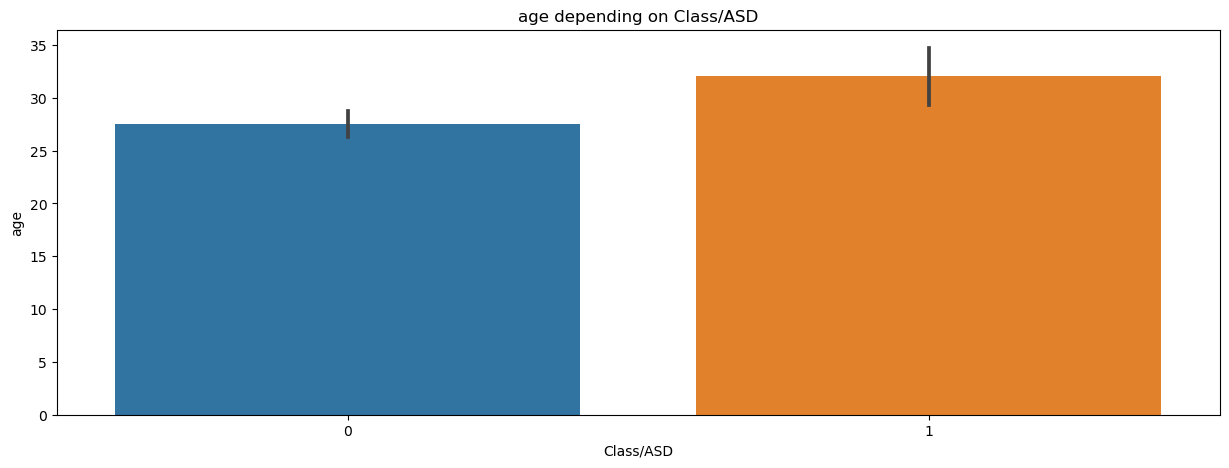

In [518]:
barplot_plot(x='Class/ASD', y='age')

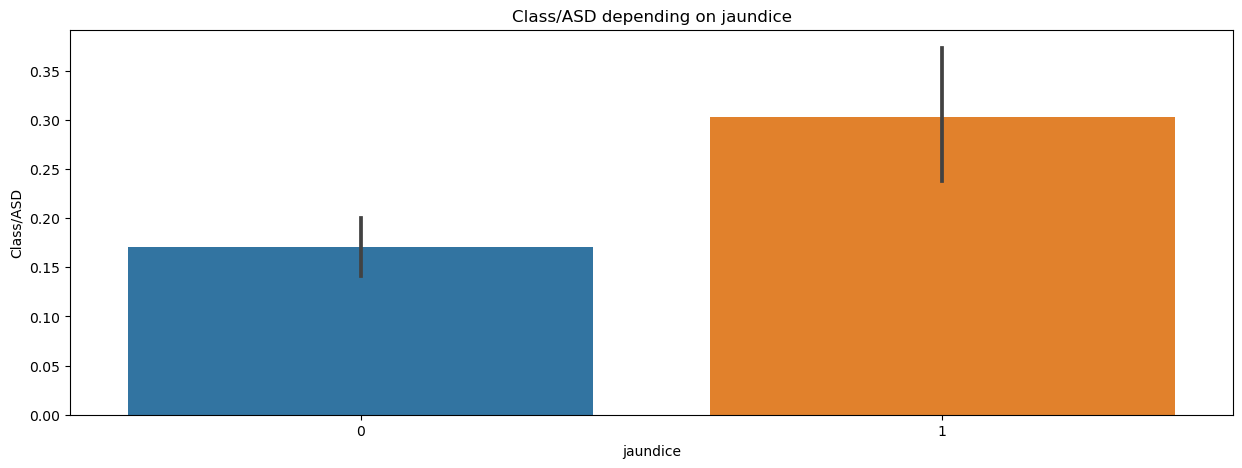

In [519]:
barplot_plot(x='jaundice')

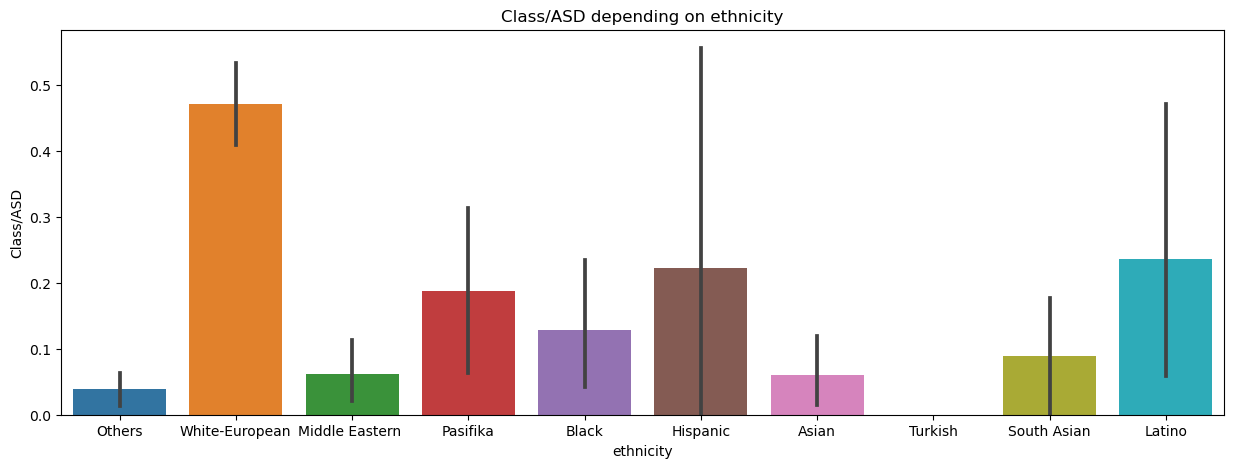

In [520]:
barplot_plot(x='ethnicity')

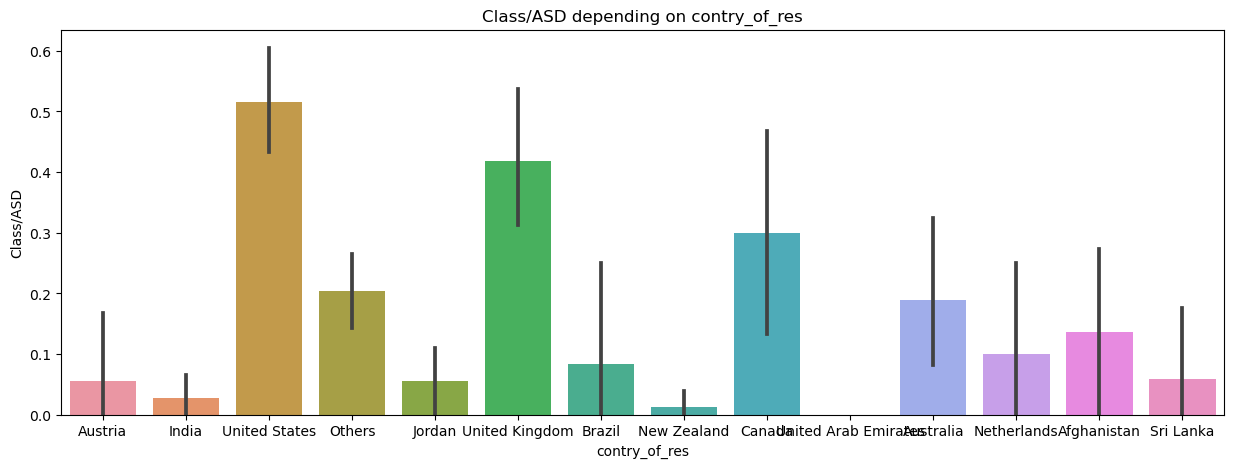

In [521]:
barplot_plot(x='contry_of_res')

По информации выше можем сделать следующие выводы: 
  
  1. Целевая переменная (Class/ASD) бинарная, следовательно перед нами стоит задача классификации.
  2. Есть дисбаланс классов целевой переменной в отношении 1:4 (положительный класс:отрицательный класс).
3. Есть две непрерывные переменные: возраст и результат. Распределение этих данных скошено, выбросов нет.   
4. Нет существенной корреляции между признаками в датасете (все значения коэффицентов корреляции меньше 0,6). Наиболее сильное взаимодействие у целовой переменной с признаками А3_Score-А7_Score, А9_Score.
5. Не наблюдается зависимости аутизма от пола и возраста. На барплоте видим, что аутизм чаще встречается у людей, которые болели желтухой. Относительно этничесокй принадлежности и страны проживания видим различия, однако они обусловлены неравным количеством подкатегорий.

In [522]:
train_test_val = DataPreprocessor(data).encode_categorical()

In [523]:
#Часть данных отложим для валидационной выборки
X_train_test, X_val, y_train_test, y_val = train_test_split((train_test_val.drop(['Class/ASD'], axis=1)), train_test_val['Class/ASD'], test_size=0.05, random_state=42, stratify=train_test_val['Class/ASD'])
print('Размер валидационной выборки:', X_val.shape)

Размер валидационной выборки: (40, 19)


In [524]:
#Разделим данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.15, random_state=42, stratify=y_train_test)
print('Размер тренировочной выборки:', X_train.shape)
print('Размер тестовой выборки:', X_test.shape)

Размер тренировочной выборки: (646, 19)
Размер тестовой выборки: (114, 19)


In [525]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [526]:
rfc = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight=({0: 1, 1:6}))

params = {'n_estimators':[300],
          'min_samples_leaf':[2,5,10,15,30,40,50],
          'max_depth':[4, 5, 10, 15, 20],
          'max_features':[0.1, 0.15, 0.2],
          'criterion':["gini"]}

grid_search = GridSearchCV(estimator=rfc,param_grid=params,verbose=1,n_jobs=-1,scoring='recall')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 1, 1: 6},
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [4, 5, 10, 15, 20],
                         'max_features': [0.1, 0.15, 0.2],
                         'min_samples_leaf': [2, 5, 10, 15, 30, 40, 50],
                         'n_estimators': [300]},
             scoring='recall', verbose=1)

In [527]:
rfc_best = grid_search.best_estimator_

In [528]:
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, roc_curve

In [529]:
def quality_report(actual, prediction):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}\nROC_AUC_score: {:.3f}".format(
        accuracy_score(actual, prediction),
        precision_score(actual, prediction),
        recall_score(actual, prediction),
        f1_score(actual, prediction),
        roc_auc_score(actual, prediction)))
    fpr, tpr, tresholds = roc_curve(actual, prediction)
    auc_score = roc_auc_score(actual, prediction)

    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC: {:.3f}'.format(auc_score))
    plt.show()
    

Метрики качества для тренировочной модели:
Accuracy: 0.766
Precision: 0.461
Recall: 0.954
f1_score: 0.622
ROC_AUC_score: 0.836


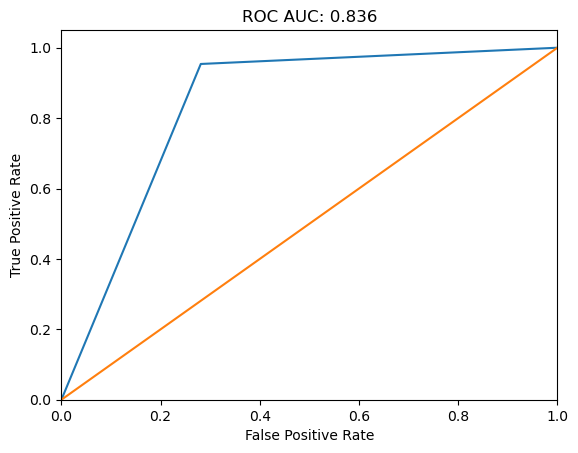

In [530]:
y_train_pred = rfc_best.predict(X_train)
print('Метрики качества для тренировочной модели:')
quality_report(y_train,y_train_pred)

Метрики качества для тестовой модели:
Accuracy: 0.737
Precision: 0.434
Recall: 1.000
f1_score: 0.605
ROC_AUC_score: 0.835


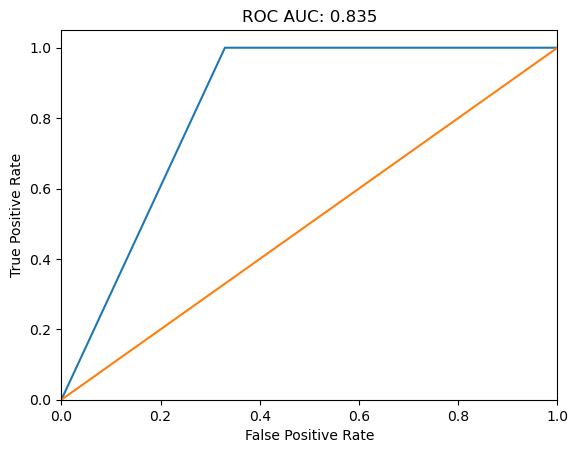

In [531]:
y_test_pred = rfc_best.predict(X_test)
print('Метрики качества для тестовой модели:')
quality_report(y_test,y_test_pred)

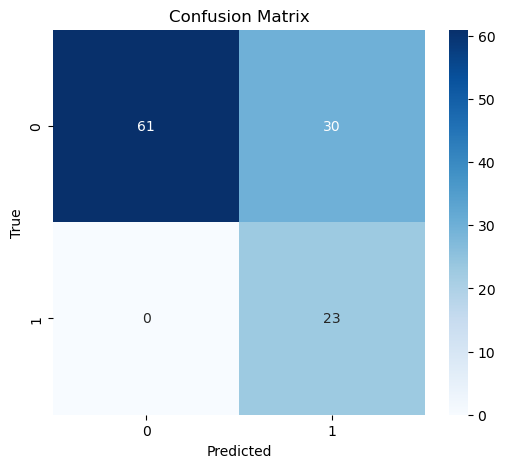

In [533]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rfc_best.predict(X_test))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [534]:
Feature_importance = pd.DataFrame({'Feature':X_train.columns,'Importance':rfc_best.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Importance',ascending=False).set_index('Feature')
Feature_importance.head(20)

,Importance
Feature,
A4_Score,0.105872
A3_Score,0.098317
A9_Score,0.094094
result,0.078633
A7_Score,0.077880
A8_Score,0.073326
A5_Score,0.068445
A10_Score,0.066831
A6_Score,0.064917


In [537]:
data_result = pd.read_csv("./input/test.csv")
data_result['Class/ASD'] = np.random.choice([0, 1], size=len(data_result))

In [538]:
data_result = DataPreprocessor(data_result).preprocess_data()

In [539]:
y_result_pred = rfc_best.predict(data_result.drop(['Class/ASD'], axis=1))

In [540]:
result = pd.DataFrame(y_result_pred)
result.columns = ['Class/ASD']

In [542]:
result.to_csv('result.csv')

Выводы: Перед нами стояла задача классификации. В виду того, что задача медицинская, очень важны ошибки второго рода (то есть наличие False Negative результатов). Поэтому метрики, на которые делался упор при обучении модели, это roc_auc и recall (больше все же на recall). Также у целевой переменной наблюдается дисбаланс классов, положительный класс в миноре. 
Итоговой моделью выбран рандомный лес.Гиперпараметры модели подбирались, используя GridSearch. Результаты для тестовой модели: recall - 1.0, roc_auc_curve - 0.835.  На матрице запутанности видим, что на тестовой выборке у нас нет FN результатов (то есть нет ошибок второго рода). Однако достаточно много ошибок первого рода (FP=30).  Наиболее важные признаки при анализе: А4_Score, A3_score, A9_score, result. Наименее важные признаки: gender, relation, used_app_before. Чтоб решить проблему с дисбанасом классов на предварительных этапах применялся метод овер-сэмплинга (андер-сэмплинг не применялся, так как датасет состоит итак из малого количества наблюдений). Однако, лучшие результаты были получены при указании весов класса в модели обучения без использования сэмплирования.  
Для обучения модели также были опробованы логистическая регрессия с кросс-валидацией, метод опорных векторов и XGBoost. Лучшим из перечисленных методов была логистическая регрессия с кросс-валидацией. В методе логистической регрессии с кросс-валидацией, StandardScaler и андер-сэмплингом были получены следующие результаты: recall 0.90, roc_auc - 0.83 для тестовой выборки. 

In [543]:
import pickle

In [544]:
filename = 'finalized_model.sav'
pickle.dump(rfc_best, open(filename, 'wb'))